Best Parameters for Count Vectorizer: {'alpha': 5.0}
Best Parameters for TF-IDF Vectorizer: {'alpha': 5.0}
Count Vectorizer - Accuracy: 0.655700325732899
Count Vectorizer - Precision: 0.6540200974795135
Count Vectorizer - Recall: 0.6566269797479988
Count Vectorizer - F1-score: 0.6550822986547388
TF-IDF Vectorizer - Accuracy: 0.6607491856677524
TF-IDF Vectorizer - Precision: 0.6600129331605289
TF-IDF Vectorizer - Recall: 0.6615898379511441
TF-IDF Vectorizer - F1-score: 0.6606447762605964


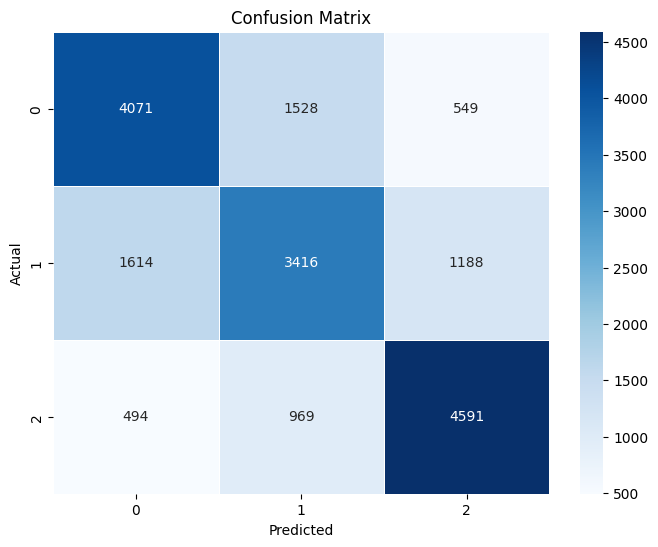

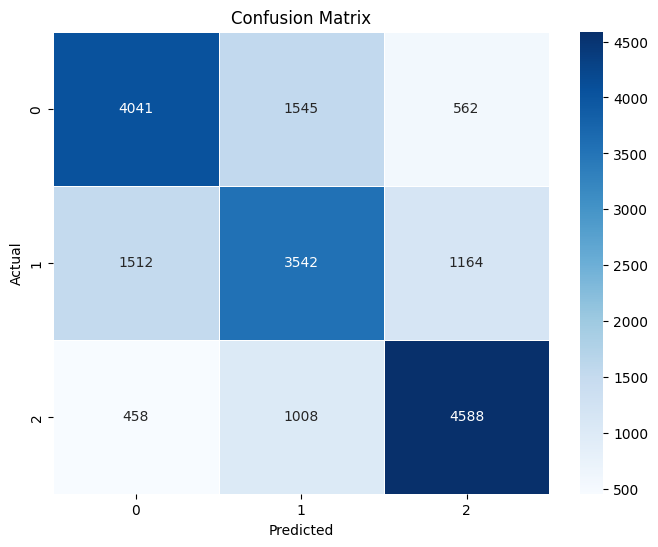

In [4]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv("C:/Users/wonny/Downloads/nlp/balanced_data.csv")

# Data processing function
def data_processing(text):
    text = text.lower()
    text = re.sub(r"<br />", " ", text)
    text = re.sub(r"[^\w\s]", " ", text)
    words = re.findall(r"\b\w+\b", text)
    return " ".join(words)

# Apply data processing to the 'review' column
data["review"] = data["review"].apply(data_processing)

# Split data into features and labels
X = data["review"]
y = data["sentiment"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(stop_words="english", lowercase=True, max_features=7000)
tfidf_vectorizer = TfidfVectorizer(stop_words="english", lowercase=True, max_features=7000)

# Transform the training and testing text data into feature vectors
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define a list of alpha values to be tested
alphas = [0.1, 0.5, 1.0, 2.0, 5.0]

# Create a parameter grid for Grid Search
param_grid = {"alpha": alphas}

# Initialize the Multinomial Naive Bayes models
clf_count = MultinomialNB()
clf_tfidf = MultinomialNB()

# Create Grid Search models with cross-validation
grid_search_count = GridSearchCV(
    clf_count, param_grid, cv=10, scoring="accuracy", n_jobs=-1
)
grid_search_tfidf = GridSearchCV(
    clf_tfidf, param_grid, cv=10, scoring="accuracy", n_jobs=-1
)

# Perform Grid Search for both models
grid_search_count.fit(X_train_counts, y_train)
grid_search_tfidf.fit(X_train_tfidf, y_train)

# Print the best hyperparameters for both models
print("Best Parameters for Count Vectorizer:", grid_search_count.best_params_)
print("Best Parameters for TF-IDF Vectorizer:", grid_search_tfidf.best_params_)

# Get the best models for both vectorizers
best_model_count = grid_search_count.best_estimator_
best_model_tfidf = grid_search_tfidf.best_estimator_

# Predict labels on the test set for both models
y_pred_count = best_model_count.predict(X_test_counts)
y_pred_tfidf = best_model_tfidf.predict(X_test_tfidf)

# Calculate and print accuracy, precision, recall, and F1-score for both models
accuracy_count = accuracy_score(y_test, y_pred_count)
precision_count = precision_score(y_test, y_pred_count, average="macro")
recall_count = recall_score(y_test, y_pred_count, average="macro")
f1_count = f1_score(y_test, y_pred_count, average="macro")

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, average="macro")
recall_tfidf = recall_score(y_test, y_pred_tfidf, average="macro")
f1_tfidf = f1_score(y_test, y_pred_tfidf, average="macro")

print("Count Vectorizer - Accuracy:", accuracy_count)
print("Count Vectorizer - Precision:", precision_count)
print("Count Vectorizer - Recall:", recall_count)
print("Count Vectorizer - F1-score:", f1_count)

print("TF-IDF Vectorizer - Accuracy:", accuracy_tfidf)
print("TF-IDF Vectorizer - Precision:", precision_tfidf)
print("TF-IDF Vectorizer - Recall:", recall_tfidf)
print("TF-IDF Vectorizer - F1-score:", f1_tfidf)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Extract Predicted Probabilities
y_prob_count = best_model_count.predict_proba(X_test_counts)[:, 1]
y_prob_tfidf = best_model_tfidf.predict_proba(X_test_tfidf)[:, 1]

# Visualization of Confusion Matrix 
plot_confusion_matrix(y_test, y_pred_count)
plot_confusion_matrix(y_test, y_pred_tfidf)

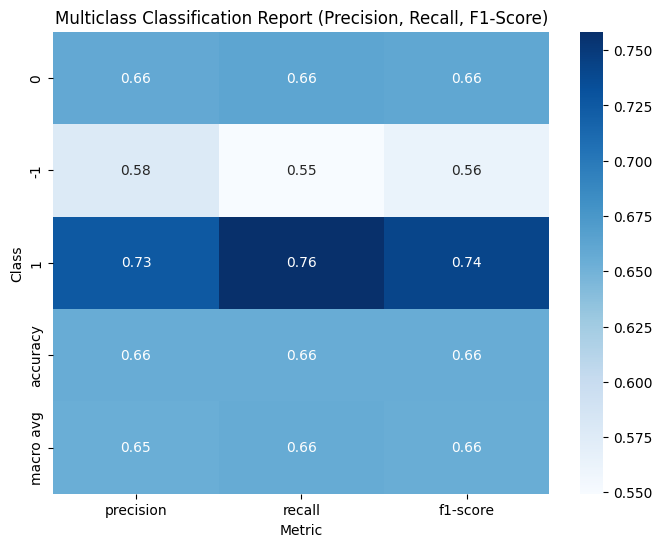

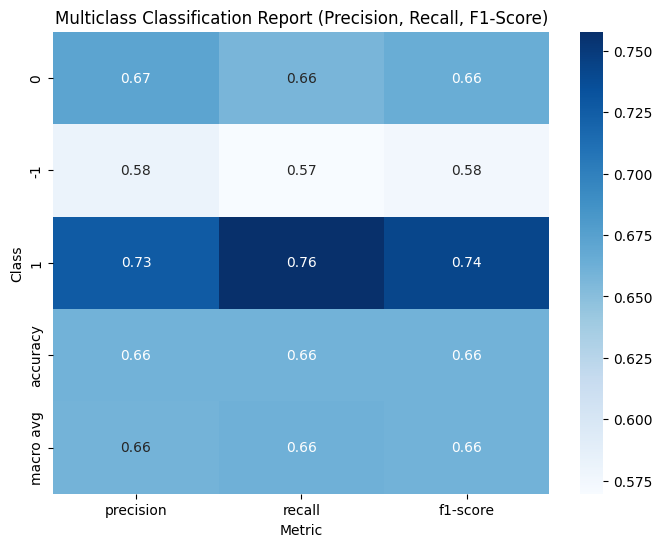

In [5]:
from sklearn.metrics import classification_report

# Display and visualize a multiclass classification report
def plot_classification_report(y_true, y_pred, target_names):
    report = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    
    # Visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_report.iloc[:-1, :3], annot=True, fmt=".2f", cmap="Blues")
    plt.xlabel('Metric')
    plt.ylabel('Class')
    plt.title('Multiclass Classification Report (Precision, Recall, F1-Score)')
    plt.show()

# Visualize the multiclass classification report using predicted class labels
plot_classification_report(y_test, y_pred_count, target_names=data["sentiment"].unique())
plot_classification_report(y_test, y_pred_tfidf, target_names=data["sentiment"].unique())

In [6]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv("C:/Users/wonny/Downloads/nlp/balanced_data.csv")

# Data processing function
def data_processing(text):
    text = text.lower()
    text = re.sub(r"<br />", " ", text)
    text = re.sub(r"[^\w\s]", " ", text)
    words = re.findall(r"\b\w+\b", text)
    return " ".join(words)

# Apply data processing to the 'review' column
data["review"] = data["review"].apply(data_processing)

# Split data into features and labels
X = data["review"]
y = data["sentiment"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(stop_words="english", lowercase=True, max_features=7000)
tfidf_vectorizer = TfidfVectorizer(stop_words="english", lowercase=True, max_features=7000)

# Transform the training and testing text data into feature vectors
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define a list of alpha values to be tested
alphas = [0.1, 0.5, 1.0, 2.0, 5.0]

# Create a parameter grid for Grid Search
param_grid = {"alpha": alphas}

# Initialize the Multinomial Naive Bayes models
clf_count = MultinomialNB()
clf_tfidf = MultinomialNB()

# Create Grid Search models with cross-validation
grid_search_count = GridSearchCV(
    clf_count, param_grid, cv=10, scoring="accuracy", n_jobs=-1
)
grid_search_tfidf = GridSearchCV(
    clf_tfidf, param_grid, cv=10, scoring="accuracy", n_jobs=-1
)

# Perform Grid Search for both models
grid_search_count.fit(X_train_counts, y_train)
grid_search_tfidf.fit(X_train_tfidf, y_train)

# Print the best hyperparameters for both models
print("Best Parameters for Count Vectorizer:", grid_search_count.best_params_)
print("Best Parameters for TF-IDF Vectorizer:", grid_search_tfidf.best_params_)

# Get the best models for both vectorizers
best_model_count = grid_search_count.best_estimator_
best_model_tfidf = grid_search_tfidf.best_estimator_

# Predict labels on the test set for both models
y_pred_count = best_model_count.predict(X_test_counts)
y_pred_tfidf = best_model_tfidf.predict(X_test_tfidf)

# Calculate and print accuracy, precision, recall, and F1-score for both models
accuracy_count = accuracy_score(y_test, y_pred_count)
precision_count = precision_score(y_test, y_pred_count, average="macro")
recall_count = recall_score(y_test, y_pred_count, average="macro")
f1_count = f1_score(y_test, y_pred_count, average="macro")

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, average="macro")
recall_tfidf = recall_score(y_test, y_pred_tfidf, average="macro")
f1_tfidf = f1_score(y_test, y_pred_tfidf, average="macro")

print("Count Vectorizer - Accuracy:", accuracy_count)
print("Count Vectorizer - Precision:", precision_count)
print("Count Vectorizer - Recall:", recall_count)
print("Count Vectorizer - F1-score:", f1_count)

print("TF-IDF Vectorizer - Accuracy:", accuracy_tfidf)
print("TF-IDF Vectorizer - Precision:", precision_tfidf)
print("TF-IDF Vectorizer - Recall:", recall_tfidf)
print("TF-IDF Vectorizer - F1-score:", f1_tfidf)

# Compare predicted results with actual labels
for i, (pred, true, text) in enumerate(zip(y_pred_count, y_test, X_test.values)):
    if pred != true:
        print(f"Index {i}: Actual: {true}, Predicted: {pred}, Text: {text}")

Best Parameters for Count Vectorizer: {'alpha': 5.0}
Best Parameters for TF-IDF Vectorizer: {'alpha': 5.0}
Count Vectorizer - Accuracy: 0.655700325732899
Count Vectorizer - Precision: 0.6540200974795135
Count Vectorizer - Recall: 0.6566269797479988
Count Vectorizer - F1-score: 0.6550822986547388
TF-IDF Vectorizer - Accuracy: 0.6607491856677524
TF-IDF Vectorizer - Precision: 0.6600129331605289
TF-IDF Vectorizer - Recall: 0.6615898379511441
TF-IDF Vectorizer - F1-score: 0.6606447762605964
Index 0: Actual: -1, Predicted: 0, Text: i was really hoping to like this coffee because the price was right and i liked that i could have it delivered on regular intervals the coffee did not have a good taste at all and left a horrible after taste it also gave me heartburn i will only buy green mountain kcups from here on in
Index 3: Actual: 0, Predicted: 1, Text: this juice tastes great and would be a wonderful way to get some healthful aloe unfortunately there is way too much pulp for my preferences 

In [8]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv("C:/Users/wonny/Downloads/nlp/synthetic_data_nltk.csv")

# Data processing function
def data_processing(text):
    text = text.lower()
    text = re.sub(r"<br />", " ", text)
    text = re.sub(r"[^\w\s]", " ", text)
    words = re.findall(r"\b\w+\b", text)
    return " ".join(words)

# Apply data processing to the 'review' column
data["text"] = data["text"].apply(data_processing)

# Split data into features and labels
X = data["text"]
y = data["label"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(stop_words="english", lowercase=True, max_features=7000)
tfidf_vectorizer = TfidfVectorizer(stop_words="english", lowercase=True, max_features=7000)

# Transform the training and testing text data into feature vectors
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define a list of alpha values to be tested
alphas = [0.1, 0.5, 1.0, 2.0, 5.0]

# Create a parameter grid for Grid Search
param_grid = {"alpha": alphas}

# Initialize the Multinomial Naive Bayes models
clf_count = MultinomialNB()
clf_tfidf = MultinomialNB()

# Create Grid Search models with cross-validation
grid_search_count = GridSearchCV(
    clf_count, param_grid, cv=10, scoring="accuracy", n_jobs=-1
)
grid_search_tfidf = GridSearchCV(
    clf_tfidf, param_grid, cv=10, scoring="accuracy", n_jobs=-1
)

# Perform Grid Search for both models
grid_search_count.fit(X_train_counts, y_train)
grid_search_tfidf.fit(X_train_tfidf, y_train)

# Print the best hyperparameters for both models
print("Best Parameters for Count Vectorizer:", grid_search_count.best_params_)
print("Best Parameters for TF-IDF Vectorizer:", grid_search_tfidf.best_params_)

# Get the best models for both vectorizers
best_model_count = grid_search_count.best_estimator_
best_model_tfidf = grid_search_tfidf.best_estimator_

# Predict labels on the test set for both models
y_pred_count = best_model_count.predict(X_test_counts)
y_pred_tfidf = best_model_tfidf.predict(X_test_tfidf)

# Calculate and print accuracy, precision, recall, and F1-score for both models
accuracy_count = accuracy_score(y_test, y_pred_count)
precision_count = precision_score(y_test, y_pred_count, average="macro")
recall_count = recall_score(y_test, y_pred_count, average="macro")
f1_count = f1_score(y_test, y_pred_count, average="macro")

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, average="macro")
recall_tfidf = recall_score(y_test, y_pred_tfidf, average="macro")
f1_tfidf = f1_score(y_test, y_pred_tfidf, average="macro")

print("Count Vectorizer - Accuracy:", accuracy_count)
print("Count Vectorizer - Precision:", precision_count)
print("Count Vectorizer - Recall:", recall_count)
print("Count Vectorizer - F1-score:", f1_count)

print("TF-IDF Vectorizer - Accuracy:", accuracy_tfidf)
print("TF-IDF Vectorizer - Precision:", precision_tfidf)
print("TF-IDF Vectorizer - Recall:", recall_tfidf)
print("TF-IDF Vectorizer - F1-score:", f1_tfidf)

Best Parameters for Count Vectorizer: {'alpha': 5.0}
Best Parameters for TF-IDF Vectorizer: {'alpha': 0.1}
Count Vectorizer - Accuracy: 0.9662
Count Vectorizer - Precision: 0.966428910722739
Count Vectorizer - Recall: 0.9660979992923933
Count Vectorizer - F1-score: 0.9661282505693927
TF-IDF Vectorizer - Accuracy: 0.9716
TF-IDF Vectorizer - Precision: 0.9714652974494967
TF-IDF Vectorizer - Recall: 0.9713792787267473
TF-IDF Vectorizer - F1-score: 0.971405879526804
